In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50-startups/50_Startups.csv
/kaggle/input/position-salaries/Position_Salaries.csv
/kaggle/input/salary/Salary.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set_style(style='darkgrid')

In [3]:
dataset = pd.read_csv('../input/salary/Salary.csv')
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
dataset.shape

(35, 2)

The data is less. This is just a simple notebook to show different Regression techniques.

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [6]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [7]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23, 1)
(12, 1)
(23,)
(12,)


# Linear Regression

In [10]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)
y_pred

array([121240.47035944,  89080.02163531,  74303.59924855, 119502.06772571,
        98641.23612087,  72565.19661482,  63873.18344613,  43012.35184129,
        64742.384763  , 113417.65850763, 108202.45060642, 147316.50986549])

In [12]:
scores = cross_val_score(lr,x,y,scoring='r2',cv=10)
scores

array([-0.38924082,  0.55149573, -1.50987515, -1.86521075,  0.25890956,
       -0.96299211, -5.67146885, -0.06293342,  0.5165588 , -5.25496272])

# Visualising Train Data

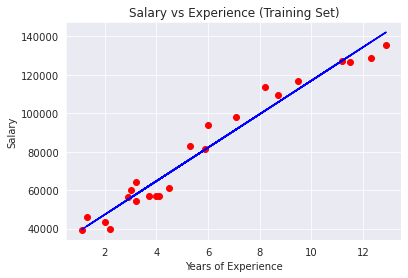

In [13]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising Test Data

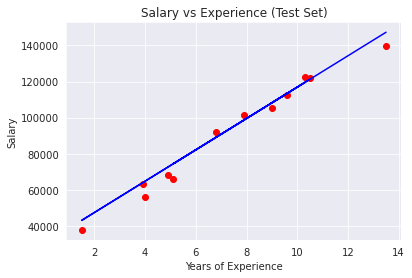

In [14]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,lr.predict(x_test),color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

In [15]:
dataset=pd.read_csv('../input/50-startups/50_Startups.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [18]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [22]:
print(lr.predict([[1,0,0,20000,14000,300000]]))

[69466.9]


In [23]:
print(lr.coef_)
print(lr.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924854249


## Hence the equation will be :
> **Profit**=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3−0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

# Polynomial Regression

In [24]:
df=pd.read_csv('../input/position-salaries/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [25]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [26]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


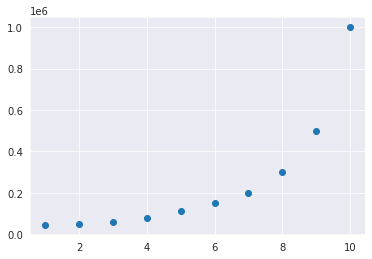

In [27]:
plt.scatter(x,y)

In [28]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [29]:
pr=PolynomialFeatures(degree=4)
x_poly=pr.fit_transform(x)

In [30]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

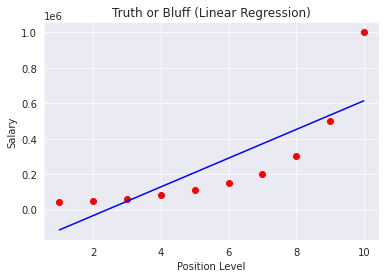

In [31]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

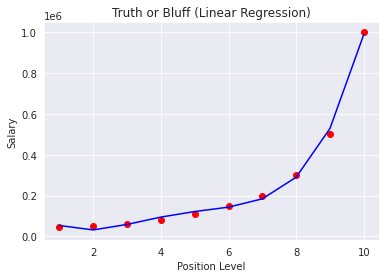

In [32]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(pr.fit_transform(x)),color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

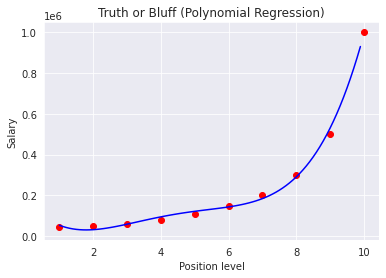

In [33]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(pr.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [34]:

lin_reg.predict([[6.5]])

array([330378.79])

In [35]:
lin_reg2.predict(pr.fit_transform([[6.5]]))

array([158862.45])

# Ridge, Lasso

In [36]:
from sklearn.datasets import load_boston

In [37]:
df = load_boston()

In [38]:
df

{'data': array([[6.32e-03, 1.80e+01, 2.31e+00, ..., 1.53e+01, 3.97e+02, 4.98e+00],
        [2.73e-02, 0.00e+00, 7.07e+00, ..., 1.78e+01, 3.97e+02, 9.14e+00],
        [2.73e-02, 0.00e+00, 7.07e+00, ..., 1.78e+01, 3.93e+02, 4.03e+00],
        ...,
        [6.08e-02, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.97e+02, 5.64e+00],
        [1.10e-01, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.93e+02, 6.48e+00],
        [4.74e-02, 0.00e+00, 1.19e+01, ..., 2.10e+01, 3.97e+02, 7.88e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,

In [39]:
data = pd.DataFrame(df.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
data.columns = df.feature_names

In [41]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
data['Price'] = df.target

In [43]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [45]:
l_reg = LinearRegression()

In [46]:
mse = cross_val_score(l_reg,X,y,cv=5,scoring='neg_mean_squared_error')
mean_mse = np.mean(mse)
print(mean_mse)

-37.13180746769922


In [47]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-6,1e-4,1e-2,1,5,10,20,30,40,45,50,55,60,70,80,100]}
reg_r=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv = 5)
reg_r.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1,
                                   5, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80,
                                   100]},
             scoring='neg_mean_squared_error')

In [48]:
print(reg_r.best_estimator_)
print(reg_r.best_score_)

Ridge(alpha=100)
-29.90570194754033


In [49]:
lasso= Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-6,1e-4,1e-2,1,5,10,20,30,40,45,50,55,60,70,80,100]}
reg_lasso=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = 5)
reg_lasso.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4475.513305607455, tolerance: 3.9191485420792076
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4283.704630914635, tolerance: 3.3071316790123455
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3965.1961611100614, tolerance: 2.813643886419753
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2545.6874

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1,
                                   5, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80,
                                   100]},
             scoring='neg_mean_squared_error')

In [50]:
print(reg_lasso.best_estimator_)
print(reg_lasso.best_score_)

Lasso(alpha=1)
-35.531580220694856


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3 , random_state = 42)

In [52]:
prediction_lasso = reg_lasso.predict(X_test)
prediction_ridge = reg_r.predict(X_test)

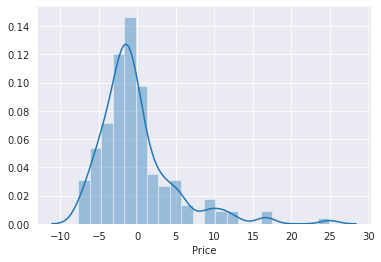

In [53]:
sns.distplot(y_test - prediction_lasso)

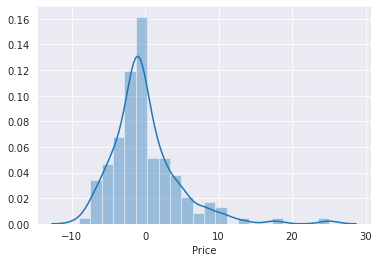

In [54]:
sns.distplot(y_test - prediction_ridge)

# SVR

In [55]:
df = pd.read_csv('../input/position-salaries/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [56]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [57]:
y=y.reshape(len(y),1)

In [58]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [59]:
regressor =SVR(kernel='rbf')
regressor.fit(X,y.ravel())

SVR()

In [60]:
print (sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))))

[170370.02]


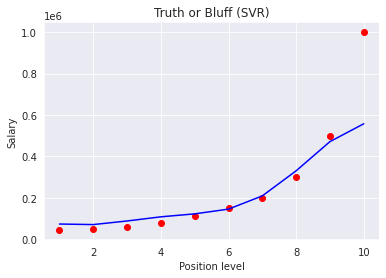

In [61]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

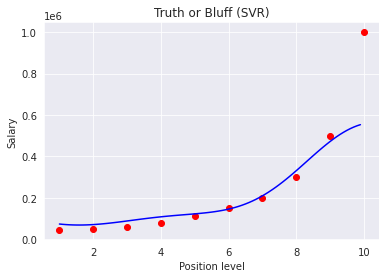

In [62]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Decision Trees

In [63]:
regressor = DecisionTreeRegressor(random_state=0)
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [64]:
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [65]:
regressor.predict([[6.5]])

array([150000.])

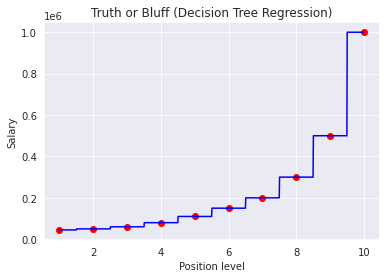

In [66]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Random Forest

In [67]:
df = pd.read_csv('../input/position-salaries/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [68]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [69]:
regressor = RandomForestRegressor(n_estimators=10, random_state= 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [70]:
regressor.predict([[6.5]])

array([167000.])

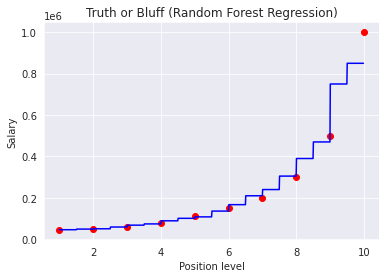

In [71]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()